#This will be my first self own project#




##Analyzing car prices Process##

###Step 1: Importing Files and Libraries###

In [1]:
from google.colab import files
#Using files from kaggle
#Upload Kaggle API

files.upload()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
#Downloading the dataset from Kaggle
!kaggle datasets download -d vagnerbessa/average-car-prices-bazil

#Unzip the file to access the data
!unzip -q average-car-prices-bazil.zip
!rm average-car-prices-bazil.zip

 81% 14.0M/17.2M [00:00<00:00, 27.5MB/s]
100% 17.2M/17.2M [00:00<00:00, 36.5MB/s]


In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###Step 2: Load and Read Data Sets###

In [4]:
data = pd.read_csv("./fipe_2022.csv")

data.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [5]:
data.shape
data["month_of_reference"].value_counts
data["fuel"].dtype

dtype('O')

In [6]:
info_diesel = data.loc[data["fuel"] == "Diesel"]
yearmodel_diesel = info_diesel.loc[info_diesel["year_model"] > 2017]
yearmodel_diesel.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
56,2022,January,060007-5,sk3fq6kdm6cb,Agrale,MARRUÁ AM 200 2.8 CS TDI Diesel,Diesel,manual,2.8,2023,376788.0,0
57,2022,January,060007-5,qqy3d7j7tsdm9,Agrale,MARRUÁ AM 200 2.8 CS TDI Diesel,Diesel,manual,2.8,2022,328054.0,1
58,2022,January,060007-5,qby36fbtlqdj2,Agrale,MARRUÁ AM 200 2.8 CS TDI Diesel,Diesel,manual,2.8,2021,317820.0,2
59,2022,January,060007-5,pbdyyjrmpndfv,Agrale,MARRUÁ AM 200 2.8 CS TDI Diesel,Diesel,manual,2.8,2020,290908.0,3
60,2022,January,060007-5,l3r5jmfxsydbm,Agrale,MARRUÁ AM 200 2.8 CS TDI Diesel,Diesel,manual,2.8,2019,232367.0,4


In [7]:
data["engine_size"] >= 3

0          True
1          True
2          True
3          True
4          True
          ...  
290270    False
290271    False
290272    False
290273    False
290274    False
Name: engine_size, Length: 290275, dtype: bool

####Seeing how many variations####

In [8]:
#Seeing how many variations
#for year of reference
data["year_of_reference"].value_counts()



2022    290275
Name: year_of_reference, dtype: int64

In [9]:
#for month of reference
data["month_of_reference"].value_counts()

#The average price corresponds to a moth of reference, i.e, FIPE updates it's table in a monthly basis.


November     24366
December     24364
October      24333
September    24324
August       24226
March        24168
July         24165
June         24123
February     24094
May          24057
January      24031
April        24024
Name: month_of_reference, dtype: int64

In [10]:
print(data["month_of_reference"])

0          January
1          January
2          January
3          January
4          January
            ...   
290270    December
290271    December
290272    December
290273    December
290274    December
Name: month_of_reference, Length: 290275, dtype: object


###Step 3: Making Plots with different Infomations###


####Finding Correlations Between Categories in the Dataset####

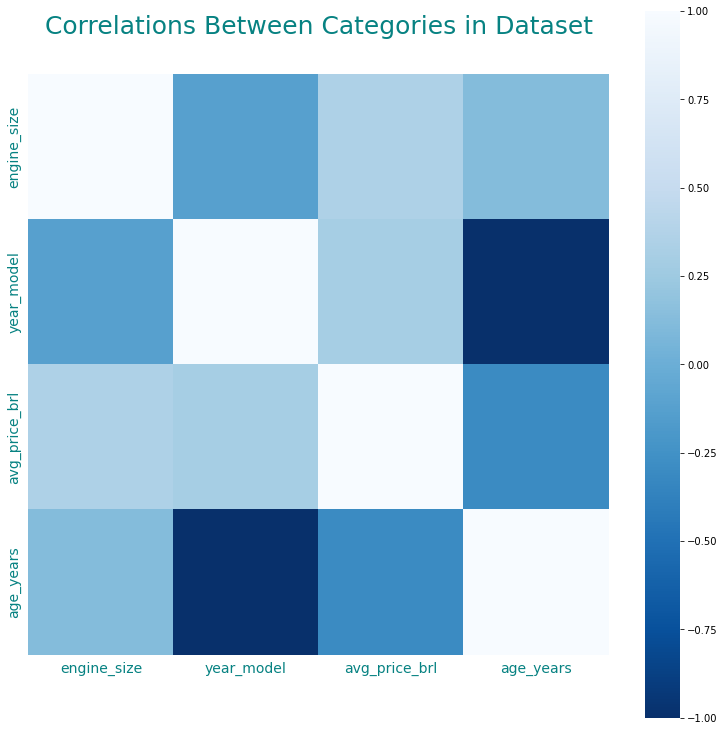

In [11]:
#Finding the correlation between catagories
new_data = data.loc[:,"engine_size":"age_years"]
correlation = new_data.corr()
fig4, cor1 = plt.subplots(figsize = (13,13))

sns.heatmap(correlation, square = True, cmap='Blues_r')


plt.tick_params(left = False)
plt.minorticks_off()
plt.tick_params(bottom = False)
plt.title("Correlations Between Categories in Dataset", fontfamily = 'sans serif', fontsize = 25, pad = 40, color = '#078282FF')

plt.xticks(color = '#078282FF', fontsize = 14)
plt.yticks(color = '#078282FF', fontsize = 14)

plt.show()

# print(type(a))

According to the Heat Map, pairs of highly correlated categories are year_model and age_years, avg_price_brl, and age_years, year_model, and engine_size. At the same time, pairs with fewer correlations are engine_size and age_years, engine_size and avg_price_brl, and year_model and arg_price_brl. This analysis will be critical in identifying the relationships between pairs of data types to build helpful charts, as the heat map tells which pair to look at more closely while ignoring other pairs. They are saving both time and resources.

How does a heat map work? In this scenario, color modes closer to #1 identified in the legend will have higher correlations. While color modes closer to #0 will have lower correlations with each other. What does correlation mean? In this analysis, a higher correlation corresponds to a higher dependency between variables, meaning that changing a variable with a high correlation will change its pair variable. There are two types of high dependencies. First, when the value of one variable in the dataset is increased, that will cause the value of its pair variable to go up. Second is when the value of one variable in the dataset is increased, that will cause the value of its pair variable to go down. Meanwhile, pairs with low correlations occur when one variable type's value does not change the value of its pair variable. In other words, the pair variables are somewhat or entirely independent. 

####Finding the Mean of Avg Price Per Vehicle each Month Focusing On Three Categories####

In [457]:
def find_mean(dataframe):
  return round(dataframe["avg_price_brl"].mean())

def find_specific_mean(dataframe, element):
  dataframe_specific = dataframe.loc[dataframe["fuel"] == element,:]
  return round(dataframe_specific["avg_price_brl"].mean())

categories = []
sizes = []
sizes_diesel = []
sizes_gas = []

In [458]:
january = data.loc[data["month_of_reference"] == "January",:]
categories.append("Jan")

#Getting the mean of each category
sizes.append(find_mean(january))
sizes_diesel.append(find_specific_mean(january, "Diesel"))
sizes_gas.append(find_specific_mean(january, "Gasoline"))

In [459]:
february = data.loc[data["month_of_reference"] == "February",:]
categories.append("Feb")

#Getting the mean of each category
sizes.append(find_mean(february))
sizes_diesel.append(find_specific_mean(february, "Diesel"))
sizes_gas.append(find_specific_mean(february, "Gasoline"))

In [460]:
march = data.loc[data["month_of_reference"] == "March",:]
categories.append("Mar")

#Getting the mean of each category
sizes.append(find_mean(march))
sizes_diesel.append(find_specific_mean(march, "Diesel"))
sizes_gas.append(find_specific_mean(march, "Gasoline"))

In [461]:
april = data.loc[data["month_of_reference"] == "April",:]
categories.append("Apr")

#Getting the mean of each category
sizes.append(find_mean(april))
sizes_diesel.append(find_specific_mean(april, "Diesel"))
sizes_gas.append(find_specific_mean(april, "Gasoline"))

In [462]:
may = data.loc[data["month_of_reference"] == "May",:]
categories.append("May")

#Getting the mean of each category
sizes.append(find_mean(may))
sizes_diesel.append(find_specific_mean(may, "Diesel"))
sizes_gas.append(find_specific_mean(may, "Gasoline"))

In [463]:
june = data.loc[data["month_of_reference"] == "June",:]
categories.append("June")

#Getting the mean of each category
sizes.append(find_mean(june))
sizes_diesel.append(find_specific_mean(june, "Diesel"))
sizes_gas.append(find_specific_mean(june, "Gasoline"))

In [464]:
july = data.loc[data["month_of_reference"] == "July",:]
categories.append("July")

#Getting the mean of each category
sizes.append(find_mean(july))
sizes_diesel.append(find_specific_mean(july, "Diesel"))
sizes_gas.append(find_specific_mean(july, "Gasoline"))

In [465]:
august = data.loc[data["month_of_reference"] == "August",:]
categories.append("Aug")

#Getting the mean of each category
sizes.append(find_mean(august))
sizes_diesel.append(find_specific_mean(august, "Diesel"))
sizes_gas.append(find_specific_mean(august, "Gasoline"))

In [466]:
september = data.loc[data["month_of_reference"] == "September",:]
categories.append("Sep")

#Getting the mean of each category
sizes.append(find_mean(september))
sizes_diesel.append(find_specific_mean(september, "Diesel"))
sizes_gas.append(find_specific_mean(september, "Gasoline"))

In [467]:
october = data.loc[data["month_of_reference"] == "October",:]
categories.append("Oct")

#Getting the mean of each category
sizes.append(find_mean(october))
sizes_diesel.append(find_specific_mean(october, "Diesel"))
sizes_gas.append(find_specific_mean(october, "Gasoline"))

In [468]:
november = data.loc[data["month_of_reference"] == "November",:]
categories.append("Nov")

#Getting the mean of each category
sizes.append(find_mean(november))
sizes_diesel.append(find_specific_mean(november, "Diesel"))
sizes_gas.append(find_specific_mean(november, "Gasoline"))

In [469]:
december = data.loc[data["month_of_reference"] == "December",:]
categories.append("Dec")

#Getting the mean of each category
sizes.append(find_mean(december))
sizes_diesel.append(find_specific_mean(december, "Diesel"))
sizes_gas.append(find_specific_mean(december, "Gasoline"))

####Pie Charts and Bar Graphs of the Mean of Avg Price Per Vehicle for Each Month Focusing On Three Categories####

In [527]:
def costumize_plot(plots, size, label_color, bar_color1, bar_color2, y_label, graph_title):
  def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontsize = 20, color = label_color)  

  plots.bar(categories, size, color = {bar_color1, bar_color2})

  plots.spines['top'].set_visible(False)
  plots.spines['right'].set_visible(False)
  plots.spines['left'].set_visible(False)
  plots.spines['bottom'].set_visible(False)

  plt.xlabel("Months", fontfamily = 'sans serif', fontsize = 25, color = label_color)
  plt.xticks(color = label_color, fontsize = 20)

  plt.yscale("log")
  plt.ylabel(y_label, fontfamily = 'sans serif', fontsize = 25, color = label_color)

  plt.tick_params(left = False)
  plt.minorticks_off()
  plt.tick_params(bottom = False)
  plt.title(graph_title, fontfamily = 'sans serif', fontsize = 25, pad = 40, color = label_color)

  addlabels(categories,size)

  plt.tight_layout()
  plt.show()


In [528]:
#plotting a piea chart of the average price per vehicle for each month in a single calendar

explodes = [0.3,0.3,0,0,0,0,0,0,0.1,0.1,0.1,0.1]

colors = ['#A07855FF','#D4B996FF']


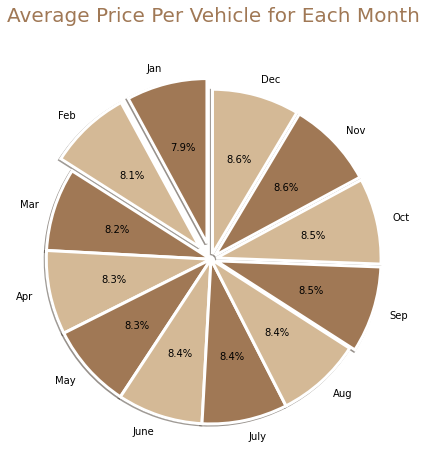

In [529]:
fig1, pie1 = plt.subplots(figsize=(7,7))
pie1.pie(sizes, explodes, categories, colors, shadow=True, radius = 3, startangle=90, autopct='%1.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'})
pie1.axis("Equal")

plt.title("Average Price Per Vehicle for Each Month", fontfamily = 'sans serif', fontsize = 20, pad = 40, color = '#A07855FF')
plt.show()


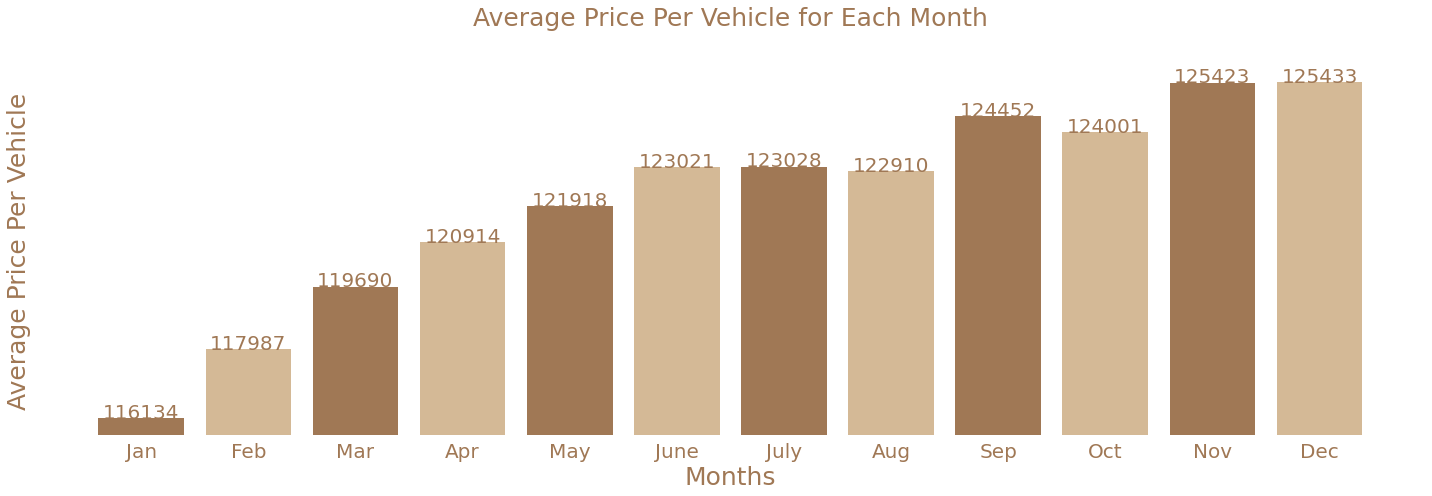

In [530]:
fig2, bar1 = plt.subplots(figsize=(20,7))

y_label = "Average Price Per Vehicle"
graph_title = "Average Price Per Vehicle for Each Month"

costumize_plot(bar1, sizes, '#A07855FF', '#A07855FF', '#D4B996FF', y_label, graph_title)


In [531]:
#plotting a piea chart of the average price per vehicle run on diesel for each month in a single calendar

explodes = [0.3,0.3,0,0,0,0,0,0,0.1,0.1,0.1,0.1]

colors = ['#FFA177FF','#F5C7B8FF']


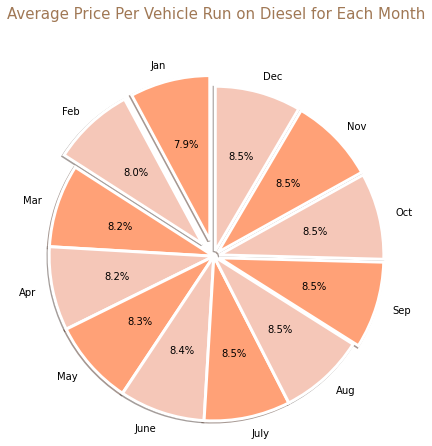

In [532]:
fig1_diesel, pie1_diesel = plt.subplots(figsize=(7,7))
pie1_diesel.pie(sizes_diesel, explodes, categories, colors, shadow=True, radius = 3, startangle=90, autopct='%1.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'})
pie1_diesel.axis("Equal")

plt.title("Average Price Per Vehicle Run on Diesel for Each Month", fontfamily = 'sans serif', fontsize = 15, pad = 40, color = '#A07855FF')
plt.show()

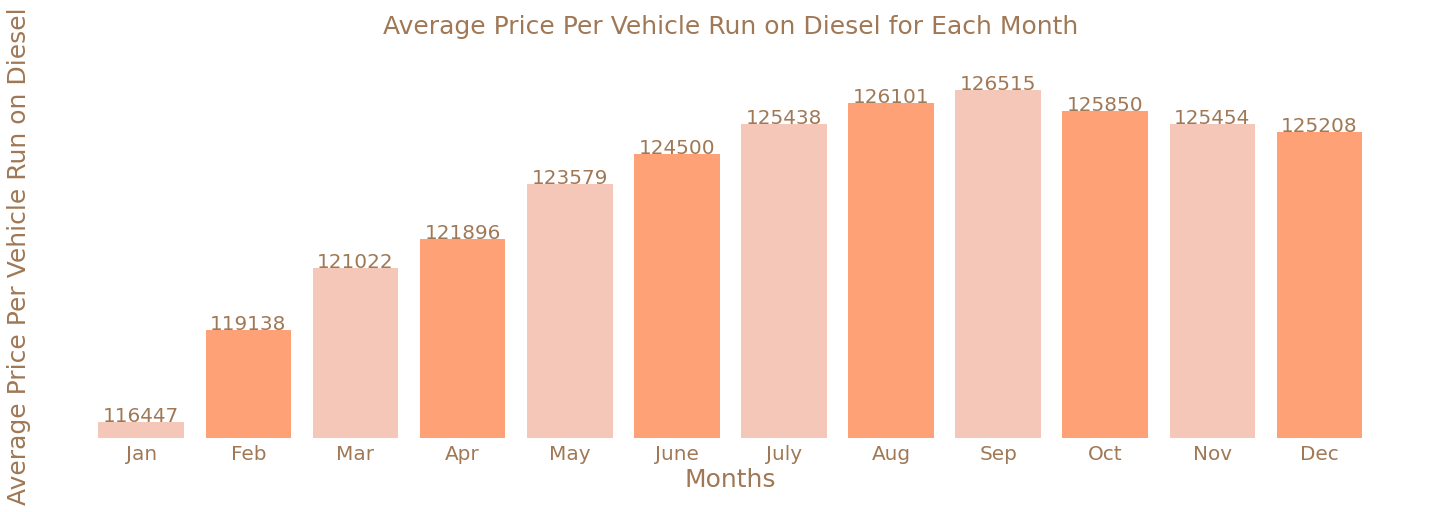

In [533]:
fig2_diesel, bar1_diesel = plt.subplots(figsize=(20,7))

y_label = "Average Price Per Vehicle Run on Diesel"
graph_title = "Average Price Per Vehicle Run on Diesel for Each Month"

costumize_plot(bar1_diesel, sizes_diesel, '#A07855FF', '#FFA177FF','#F5C7B8FF', y_label, graph_title)

In [534]:
#plotting a pie chart of the average price per vehicle run on gas for each month in a single calendar

explodes = [0.3,0.3,0,0,0,0,0,0,0.1,0.1,0.1,0.1]

colors = ['#EDC2D8FF','#8ABAD3FF']

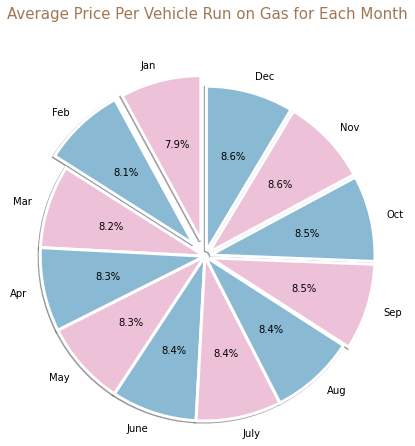

In [535]:
fig1_gas, pie1_gas = plt.subplots(figsize=(7,7))
pie1_gas.pie(sizes_gas, explodes, categories, colors, shadow=True, radius = 3, startangle=90, autopct='%1.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'})
pie1_gas.axis("Equal")

plt.title("Average Price Per Vehicle Run on Gas for Each Month", fontfamily = 'sans serif', fontsize = 15, pad = 40, color = '#A07855FF')
plt.show()

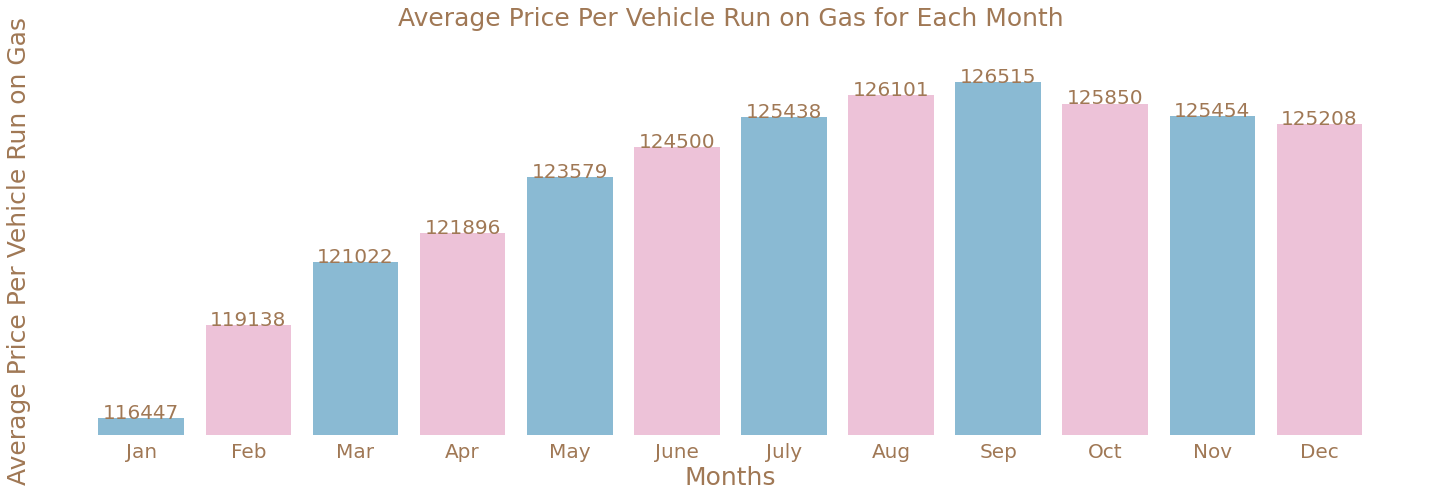

In [536]:
fig2_gas, bar1_gas = plt.subplots(figsize=(20,7))

y_label = "Average Price Per Vehicle Run on Gas"
graph_title = "Average Price Per Vehicle Run on Gas for Each Month"

costumize_plot(bar1_gas, sizes_diesel, '#A07855FF', '#EDC2D8FF', '#8ABAD3FF', y_label, graph_title)

 After analyzing the pie charts and the bar graphs, we can see that the Average Price Per Vehicle for Each Month increases as the date approaches closer to the last quarter month of the calendar. But why? Isn't it ironic that prices should be lower due to significant holiday sales? For example, Black Friday, Cyber Monday, and Christmas. These times of the year when consumers would spend a fortune of their earnings and savings to buy gifts and other services, thinking they are doing themselves a favor and saving money during the holidays. Unfortunately, the reality of getting good deals is more complex. When demands are high, and resources are limited, we face the problem of inflation. According to the chart, consumers should make purchases after the holidays, such as in January or February, when the demands are much lower, and goods become plentiful. 

 Not just the costs of small and family-friendly vehicles that saw prices peak in the last quarter months of the calendar, but also extensive performance transporting cars such as mini-trucks.

 Conclusion so far: For regular consumers, to get a good deal on car prices, it is best to wait after the holidays to make purchases as demands are much lower, meaning more options to choose from at a much lower price. On the other hand, for retailers wanting to maximize profits, getting consumers to spend more during the holidays will be the primary goal to hit.

 **Making the Pie Charts and Bar Graphs:** The process of making the pie chart and bar graphs are the same. Both show the average price per vehicle for each month. I have three different plottings: (**First** - average pricing of any car in each month), (**Second** - average pricing of any vehicle that runs on diesel in each month), and (**Third** - average pricing of any car that runs on gasoline in each month). The pie charts show the differences in the pricing percentage between each month. At the same time, the bar graphs show the gap in pricing per vehicle each month. 

####Finding the Mean of Avg Price Per Vehicle for Each Year Focusing on Three Categories####

In [351]:
data["brand"].value_counts()

GM - Chevrolet     28179
VW - VolksWagen    28142
Fiat               26563
Ford               24150
Mercedes-Benz      17470
                   ...  
Saturn                24
GEELY                 24
Saab                  24
Lotus                 24
SHINERAY              24
Name: brand, Length: 86, dtype: int64

In [352]:
# data["year_model"].value_counts()

In [353]:
# data.loc[:,["year_model", "avg_price_brl","fuel"]]

In [354]:
def find_mean(dataframe):
  return round(dataframe["avg_price_brl"].mean())

def find_specific_mean(dataframe, element):
  dataframe_specific = dataframe.loc[dataframe["fuel"] == element,:]
  return round(dataframe_specific["avg_price_brl"].mean())

years = []
means = []
means_diesel = []
means_gas = []

In [355]:
year_1985 = data.loc[data["year_model"] == 1985]
years.append(1985)

means.append(find_mean(year_1985))
means_diesel.append(find_specific_mean(year_1985, "Diesel"))
means_gas.append(find_specific_mean(year_1985, "Gasoline"))

In [356]:
year_1986 = data.loc[data["year_model"] == 1986]
years.append(1986)

means.append(find_mean(year_1986))
means_diesel.append(find_specific_mean(year_1986, "Diesel"))
means_gas.append(find_specific_mean(year_1986, "Gasoline"))

In [357]:
year_1987 = data.loc[data["year_model"] == 1987]
years.append(1987)

means.append(find_mean(year_1987))
means_diesel.append(find_specific_mean(year_1987, "Diesel"))
means_gas.append(find_specific_mean(year_1987, "Gasoline"))

In [358]:
year_1988 = data.loc[data["year_model"] == 1988]
years.append(1988)

means.append(find_mean(year_1988))
means_diesel.append(find_specific_mean(year_1988, "Diesel"))
means_gas.append(find_specific_mean(year_1988, "Gasoline"))

In [359]:
year_1989 = data.loc[data["year_model"] == 1989]
years.append(1989)

means.append(find_mean(year_1989))
means_diesel.append(find_specific_mean(year_1989, "Diesel"))
means_gas.append(find_specific_mean(year_1989, "Gasoline"))

In [360]:
year_1990 = data.loc[data["year_model"] == 1990]
years.append(1990)

means.append(find_mean(year_1990))
means_diesel.append(find_specific_mean(year_1990, "Diesel"))
means_gas.append(find_specific_mean(year_1990, "Gasoline"))

In [361]:
year_1991 = data.loc[data["year_model"] == 1991]
years.append(1991)

means.append(find_mean(year_1991))
means_diesel.append(find_specific_mean(year_1991, "Diesel"))
means_gas.append(find_specific_mean(year_1991, "Gasoline"))

In [362]:
year_1992 = data.loc[data["year_model"] == 1992]
years.append(1992)

means.append(find_mean(year_1992))
means_diesel.append(find_specific_mean(year_1992, "Diesel"))
means_gas.append(find_specific_mean(year_1992, "Gasoline"))

In [363]:
year_1993 = data.loc[data["year_model"] == 1993]
years.append(1993)

means.append(find_mean(year_1993))
means_diesel.append(find_specific_mean(year_1993, "Diesel"))
means_gas.append(find_specific_mean(year_1993, "Gasoline"))

In [364]:
year_1994 = data.loc[data["year_model"] == 1994]
years.append(1994)

means.append(find_mean(year_1994))
means_diesel.append(find_specific_mean(year_1994, "Diesel"))
means_gas.append(find_specific_mean(year_1994, "Gasoline"))

In [365]:
year_1995 = data.loc[data["year_model"] == 1995]
years.append(1995)

means.append(find_mean(year_1995))
means_diesel.append(find_specific_mean(year_1995, "Diesel"))
means_gas.append(find_specific_mean(year_1995, "Gasoline"))

In [366]:
year_1996 = data.loc[data["year_model"] == 1996]
years.append(1996)

means.append(find_mean(year_1996))
means_diesel.append(find_specific_mean(year_1996, "Diesel"))
means_gas.append(find_specific_mean(year_1996, "Gasoline"))

In [367]:
year_1997 = data.loc[data["year_model"] == 1997]
years.append(1997)

means.append(find_mean(year_1997))
means_diesel.append(find_specific_mean(year_1997, "Diesel"))
means_gas.append(find_specific_mean(year_1997, "Gasoline"))

In [368]:
year_1998 = data.loc[data["year_model"] == 1998]
years.append(1998)

means.append(find_mean(year_1998))
means_diesel.append(find_specific_mean(year_1998, "Diesel"))
means_gas.append(find_specific_mean(year_1998, "Gasoline"))

In [369]:
year_1999 = data.loc[data["year_model"] == 1999]
years.append(1999)

means.append(find_mean(year_1999))
means_diesel.append(find_specific_mean(year_1999, "Diesel"))
means_gas.append(find_specific_mean(year_1999, "Gasoline"))

In [370]:
year_2000 = data.loc[data["year_model"] == 2000]
years.append(2000)

means.append(find_mean(year_2000))
means_diesel.append(find_specific_mean(year_2000, "Diesel"))
means_gas.append(find_specific_mean(year_2000, "Gasoline"))

In [371]:
year_2001 = data.loc[data["year_model"] == 2001]
years.append(2001)

means.append(find_mean(year_2001))
means_diesel.append(find_specific_mean(year_2001, "Diesel"))
means_gas.append(find_specific_mean(year_2001, "Gasoline"))

In [372]:
year_2002 = data.loc[data["year_model"] == 2002]
years.append(2002)

means.append(find_mean(year_2002))
means_diesel.append(find_specific_mean(year_2002, "Diesel"))
means_gas.append(find_specific_mean(year_2002, "Gasoline"))

In [373]:
year_2003 = data.loc[data["year_model"] == 2003]
years.append(2003)

means.append(find_mean(year_2003))
means_diesel.append(find_specific_mean(year_2003, "Diesel"))
means_gas.append(find_specific_mean(year_2003, "Gasoline"))

In [374]:
year_2004 = data.loc[data["year_model"] == 2004]
years.append(2004)

means.append(find_mean(year_2004))
means_diesel.append(find_specific_mean(year_2004, "Diesel"))
means_gas.append(find_specific_mean(year_2004, "Gasoline"))

In [375]:
year_2005 = data.loc[data["year_model"] == 2005]
years.append(2005)

means.append(find_mean(year_2005))
means_diesel.append(find_specific_mean(year_2005, "Diesel"))
means_gas.append(find_specific_mean(year_2005, "Gasoline"))

In [376]:
year_2006 = data.loc[data["year_model"] == 2006]
years.append(2006)

means.append(find_mean(year_2006))
means_diesel.append(find_specific_mean(year_2006, "Diesel"))
means_gas.append(find_specific_mean(year_2006, "Gasoline"))

In [377]:
year_2007 = data.loc[data["year_model"] == 2007]
years.append(2007)

means.append(find_mean(year_2007))
means_diesel.append(find_specific_mean(year_2007, "Diesel"))
means_gas.append(find_specific_mean(year_2007, "Gasoline"))

In [378]:
year_2008 = data.loc[data["year_model"] == 2008]
years.append(2008)

means.append(find_mean(year_2008))
means_diesel.append(find_specific_mean(year_2008, "Diesel"))
means_gas.append(find_specific_mean(year_2008, "Gasoline"))

In [379]:
year_2009 = data.loc[data["year_model"] == 2009]
years.append(2009)

means.append(find_mean(year_2009))
means_diesel.append(find_specific_mean(year_2009, "Diesel"))
means_gas.append(find_specific_mean(year_2009, "Gasoline"))

In [380]:
year_2010 = data.loc[data["year_model"] == 2010]
years.append(2010)

means.append(find_mean(year_2010))
means_diesel.append(find_specific_mean(year_2010, "Diesel"))
means_gas.append(find_specific_mean(year_2010, "Gasoline"))

In [381]:
year_2011 = data.loc[data["year_model"] == 2011]
years.append(2011)

means.append(find_mean(year_2011))
means_diesel.append(find_specific_mean(year_2011, "Diesel"))
means_gas.append(find_specific_mean(year_2011, "Gasoline"))

In [382]:
year_2012 = data.loc[data["year_model"] == 2012]
years.append(2012)

means.append(find_mean(year_2012))
means_diesel.append(find_specific_mean(year_2012, "Diesel"))
means_gas.append(find_specific_mean(year_2012, "Gasoline"))

In [383]:
year_2013 = data.loc[data["year_model"] == 2013]
years.append(2013)

means.append(find_mean(year_2013))
means_diesel.append(find_specific_mean(year_2013, "Diesel"))
means_gas.append(find_specific_mean(year_2013, "Gasoline"))

In [384]:
year_2014 = data.loc[data["year_model"] == 2014]
years.append(2014)

means.append(find_mean(year_2014))
means_diesel.append(find_specific_mean(year_2014, "Diesel"))
means_gas.append(find_specific_mean(year_2014, "Gasoline"))

In [385]:
year_2015 = data.loc[data["year_model"] == 2015]
years.append(2015)

means.append(find_mean(year_2015))
means_diesel.append(find_specific_mean(year_2015, "Diesel"))
means_gas.append(find_specific_mean(year_2015, "Gasoline"))

In [386]:
year_2016 = data.loc[data["year_model"] == 2016]
years.append(2016)

means.append(find_mean(year_2016))
means_diesel.append(find_specific_mean(year_2016, "Diesel"))
means_gas.append(find_specific_mean(year_2016, "Gasoline"))

In [387]:
year_2017 = data.loc[data["year_model"] == 2017]
years.append(2017)

means.append(find_mean(year_2017))
means_diesel.append(find_specific_mean(year_2017, "Diesel"))
means_gas.append(find_specific_mean(year_2017, "Gasoline"))

In [388]:
year_2018 = data.loc[data["year_model"] == 2018]
years.append(2018)

means.append(find_mean(year_2018))
means_diesel.append(find_specific_mean(year_2018, "Diesel"))
means_gas.append(find_specific_mean(year_2018, "Gasoline"))

In [389]:
year_2019 = data.loc[data["year_model"] == 2019]
years.append(2019)

means.append(find_mean(year_2019))
means_diesel.append(find_specific_mean(year_2019, "Diesel"))
means_gas.append(find_specific_mean(year_2019, "Gasoline"))

In [390]:
year_2020 = data.loc[data["year_model"] == 2020]
years.append(2020)

means.append(find_mean(year_2020))
means_diesel.append(find_specific_mean(year_2020, "Diesel"))
means_gas.append(find_specific_mean(year_2020, "Gasoline"))

In [391]:
year_2021 = data.loc[data["year_model"] == 2021]
years.append(2021)

means.append(find_mean(year_2021))
means_diesel.append(find_specific_mean(year_2021, "Diesel"))
means_gas.append(find_specific_mean(year_2021, "Gasoline"))

In [392]:
year_2022 = data.loc[data["year_model"] == 2022]
years.append(2022)

means.append(find_mean(year_2022))
means_diesel.append(find_specific_mean(year_2022, "Diesel"))
means_gas.append(find_specific_mean(year_2022, "Gasoline"))

In [393]:
year_2023 = data.loc[data["year_model"] == 2023]
years.append(2023)

means.append(find_mean(year_2023))
means_diesel.append(find_specific_mean(year_2023, "Diesel"))
means_gas.append(find_specific_mean(year_2023, "Gasoline"))

####Graph the Mean of Avg Price Per Vehicle for Each Year Focusing on Three Categories####

(array([1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07]),
 <a list of 6 Text major ticklabel objects>)

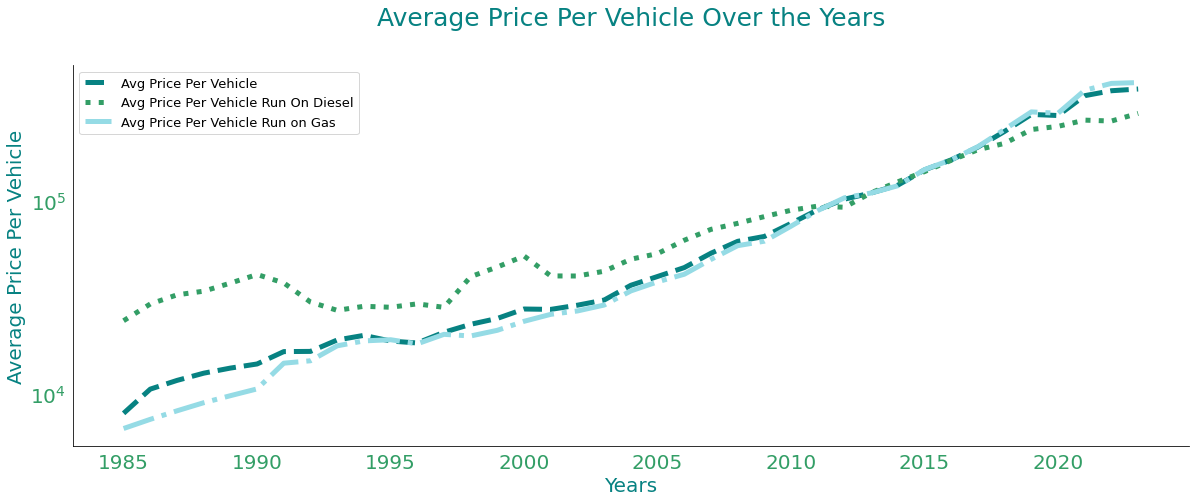

In [394]:
fig3, plot3 = plt.subplots(figsize=(20,7))

plot3.plot(years, means, label = "Avg Price Per Vehicle", linestyle = "--", linewidth=5, color="#078282FF")
plot3.plot(years, means_diesel, label = "Avg Price Per Vehicle Run On Diesel", linestyle = ":", linewidth=5, color="#339E66FF")
plot3.plot(years, means_gas, label = "Avg Price Per Vehicle Run on Gas", linestyle = "-.", linewidth=5, color="#95DBE5FF")
plot3.legend(fontsize=13)
plt.yscale("log")


plot3.spines['top'].set_visible(False)
plot3.spines['right'].set_visible(False)


plt.tick_params(left = False)
plt.minorticks_off()
plt.tick_params(bottom = False)
plt.title("Average Price Per Vehicle Over the Years", fontfamily = 'sans serif', fontsize = 25, pad = 40, color = '#078282FF')

plt.xlabel("Years", fontfamily = 'sans serif', fontsize = 20, color = '#078282FF')
plt.xticks(color = '#339E66FF', fontsize = 20)

plt.ylabel("Average Price Per Vehicle", fontfamily = 'sans serif', fontsize = 20, color = '#078282FF')
plt.yticks(color = '#339E66FF', fontsize = 20)




According to the graphs, the average price per vehicle has increased linearly over the years from 1985 to 2023. Despite the vehicle type difference, the prices all trend upward. This trend will likely continue as more luxurious and expensive vehicles like EVs or Hybrids become popular among consumers. This shift of culture has been impacted mainly by the significant issue of climate change, rising fuel prices, and modernization. Unfortunately, increasing prices also caused more consumers than ever to reiterate their choices into considering other options, such as used vehicles, for a cheaper deal. Spiking demands in used cars have driven prices up dramatically, leaving many running out of affordable vehicle options.

**Making the Plots**: In this plot, I have three different graphs corresponding to average pricing per car, average pricing per car running on diesel, and average pricing per car running on gasoline. I took the average pricing for each of the three categories in each year and plotted them to see the trend that the prices are making. It is expected for pricing to increase as I have to account for higher wages, raw materials, etc.

####Finding the Differece In Range of Avg Price Per Vehicle Run On Gasoline and Diesel Over the Years#### 

In [76]:
diesel_vehicle = data.loc[data["fuel"] == "Diesel"]
price_diesel = diesel_vehicle["avg_price_brl"]
year_diesel = diesel_vehicle["year_model"]

price = data["avg_price_brl"]
year = data["year_model"]


gas_vehicle = data.loc[data["fuel"] == "Gasoline"]
price_gas = gas_vehicle["avg_price_brl"]
year_gas = gas_vehicle["year_model"]

In [77]:
a = price_diesel/1000
print(a.max())

1034.127


####Scatter Plots of the Difference In Range of Avg Price Per Vehicle Run On Gasoline and Diesel Over the Years####


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

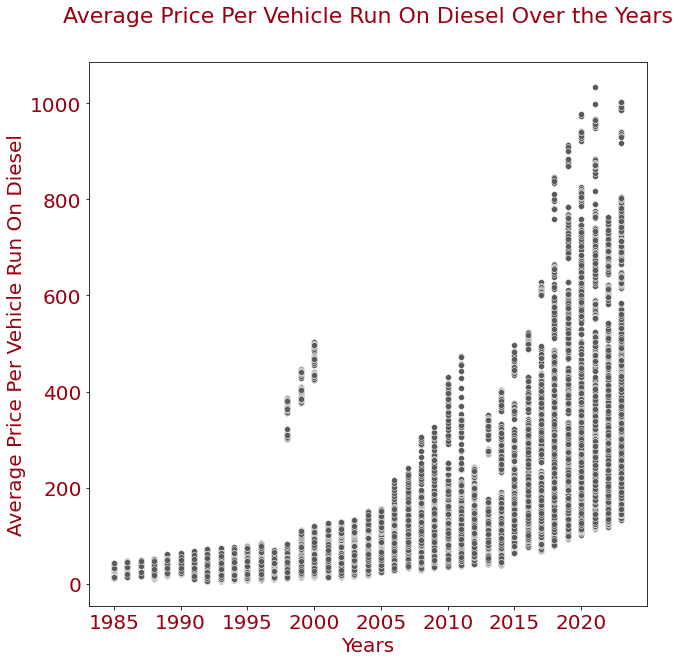

In [78]:
fig5, price1 = plt.subplots(figsize=(10,10))

sns.scatterplot(year_diesel, price_diesel/1000, color = '#5A5A5A')

plt.title("Average Price Per Vehicle Run On Diesel Over the Years", fontfamily = 'sans serif', fontsize = 22, pad = 40, color = '#990011FF')

plt.xlabel("Years", fontfamily = 'sans serif', fontsize = 20, color = '#990011FF')
plt.xticks(color = '#990011FF', fontsize = 20)

plt.ylabel("Average Price Per Vehicle Run On Diesel", fontfamily = 'sans serif', fontsize = 20, color = '#990011FF')
plt.yticks(color = '#990011FF', fontsize = 20)


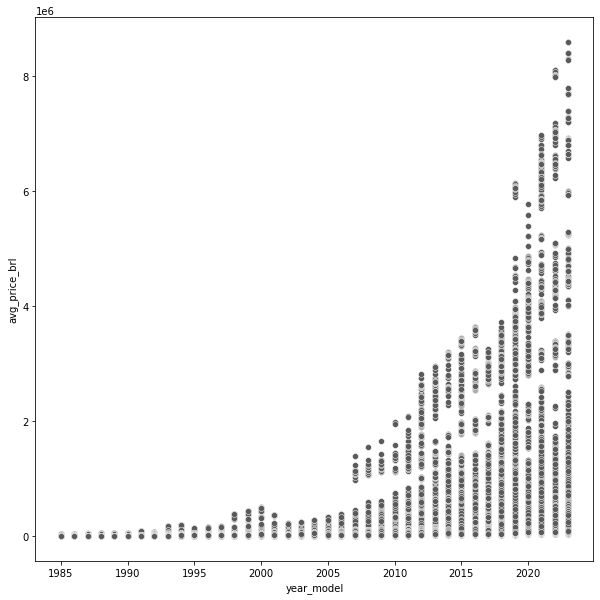

In [79]:
fig12, example = plt.subplots(figsize=(10,10))
sns.scatterplot(year, price, color = '#5A5A5A')

In [80]:
b = data["avg_price_brl"]
b.min()
b.mean()
b.std()

321913.88619752746

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000.]), <a list of 7 Text major ticklabel objects>)

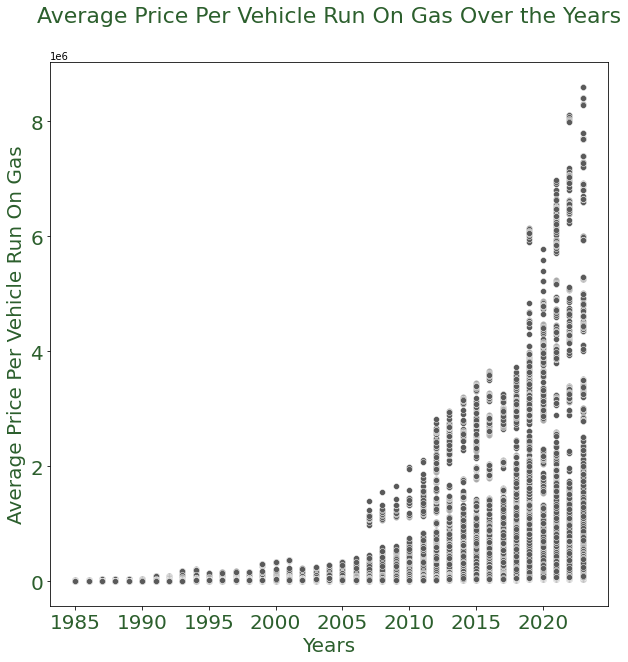

In [81]:
fig6, price2 = plt.subplots(figsize=(10,10))

sns.scatterplot(year_gas, price_gas, color = '#5A5A5A')


plt.title("Average Price Per Vehicle Run On Gas Over the Years", fontfamily = 'sans serif', fontsize = 22, pad = 40, color = '#2C5F2D')

plt.xlabel("Years", fontfamily = 'sans serif', fontsize = 20, color = '#2C5F2D')
plt.xticks(color = '#2C5F2D', fontsize = 20)

plt.ylabel("Average Price Per Vehicle Run On Gas", fontfamily = 'sans serif', fontsize = 20, color = '#2C5F2D')
plt.yticks(color = '#2C5F2D', fontsize = 20)

According to the Scatter Plots, following the year 2007, the rate of vehicle present on the road has skyrocketed. Along with the increasing production of vehicles, more cars are valued than ever. The rate of high-cost vehicles continues to increase significantly year after year. This trend holds for both vehicles running on diesel and gasoline. 

Though, why are more vehicles costing more over the years when manufacturing, transportations, and access to raw materials are readily available at a much lower price? Shouldn't the ideology of mass manufacturing and assembly line increase production rate while reducing cost hold true?

####Finding the Differece In Range of Avg Price Per Vehicle Run On Gasoline and Diesel With Different Engine Sizes#### 

In [82]:
diesel_vehicle = data.loc[data["fuel"] == "Diesel"]
price_diesel = diesel_vehicle["avg_price_brl"]
engine_diesel = diesel_vehicle["engine_size"]

gas_vehicle = data.loc[data["fuel"] == "Gasoline"]
price_gas = gas_vehicle["avg_price_brl"]
engine_gas = gas_vehicle["engine_size"]

####Scatter Plots of the Difference In Range of Avg Price Per Vehicle Run On Gasoline and Diesel With Different Engine Sizes####

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]), <a list of 8 Text major ticklabel objects>)

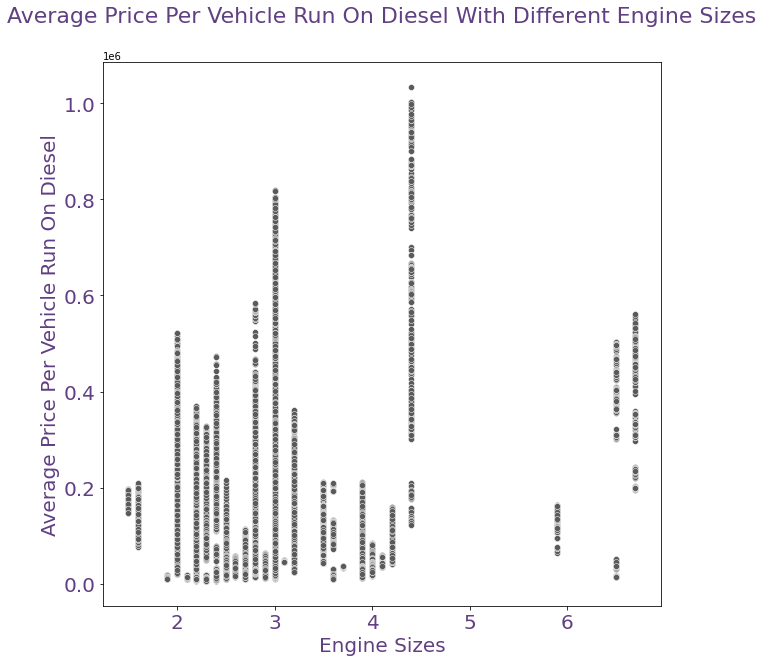

In [83]:
fig7, engine1 = plt.subplots(figsize=(10,10))

sns.scatterplot(engine_diesel, price_diesel, color = '#5A5A5A')

plt.title("Average Price Per Vehicle Run On Diesel With Different Engine Sizes", fontfamily = 'sans serif', fontsize = 22, pad = 40, color = '#603F83FF')

plt.xlabel("Engine Sizes", fontfamily = 'sans serif', fontsize = 20, color = '#603F83FF')
plt.xticks(color = '#603F83FF', fontsize = 20)

plt.ylabel("Average Price Per Vehicle Run On Diesel", fontfamily = 'sans serif', fontsize = 20, color = '#603F83FF')
plt.yticks(color = '#603F83FF', fontsize = 20)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000.]), <a list of 7 Text major ticklabel objects>)

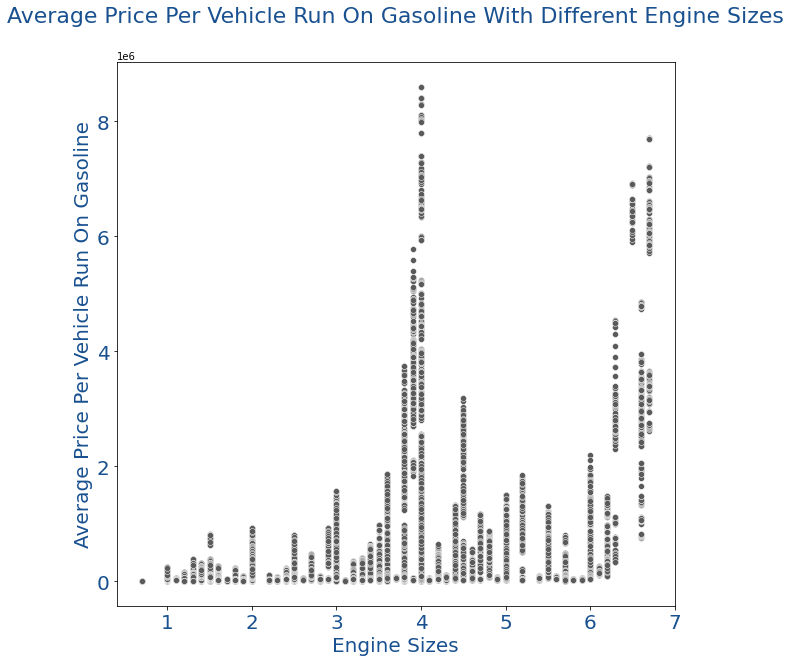

In [84]:
fig8, engine2 = plt.subplots(figsize=(10,10))

sns.scatterplot(engine_gas, price_gas, color = '#5A5A5A')

plt.title("Average Price Per Vehicle Run On Gasoline With Different Engine Sizes", fontfamily = 'sans serif', fontsize = 22, pad = 40, color = '#195190FF')

plt.xlabel("Engine Sizes", fontfamily = 'sans serif', fontsize = 20, color = '#195190FF')
plt.xticks(color = '#195190FF', fontsize = 20)

plt.ylabel("Average Price Per Vehicle Run On Gasoline", fontfamily = 'sans serif', fontsize = 20, color = '#195190FF')
plt.yticks(color = '#195190FF', fontsize = 20)

Diesel Engine: According to the scatter plot, more consumers prefer to own a vehicle that runs on diesel with an engine size between the range of 2 to 4.5. And most cars with engine sizes in the range of 2 - 4.5 cost less than 0.4 on a 0-1 scale. 

I previously thought diesel engines were primarily equipped in trucks, vehicles with high loading capacity, or high-performing cars. And most of the time, larger vehicles are typically built containing bigger engines. However, the plot does not agree that smaller engines running on diesel are preferred. A few reasons to support the data are that diesel outputs more power. Therefore, a bigger engine size is not necessary, or a smaller engine is lighter, corresponding to more speedy vehicle performance. 

Gasoline Engine: According to the scatter plot, more consumers prefer to own a gasoline vehicle with an engine size of 4 or 7. The average price for a vehicle with an engine size of 4 or 7 is around 4. 

Despite both engines running on diesel and gasoline costing around the same average price, the size of an engine running on diesel and an engine running on gasoline differ significantly as smaller diesel engines are more popular among consumers. At the same time, buyers prefer larger gasoline engines.



####Brand and fuel type
Fuel type and gear type

year model and gear

have self contained sections

####Later Use

In [85]:
print("standard deviation: ", data["avg_price_brl"].std())

standard deviation:  321913.88619752746


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


In [87]:
#Removing all emp
df = data.dropna(inplace = True)

print(data)

        year_of_reference month_of_reference fipe_code authentication  brand  \
0                    2022            January  038001-6     vwmrywl5qs  Acura   
1                    2022            January  038001-6     t9mt723qhz  Acura   
2                    2022            January  038001-6     tr5wv4z21g  Acura   
3                    2022            January  038001-6     s2xxsjz3mt  Acura   
4                    2022            January  038001-6     rtm9gj7zk8  Acura   
...                   ...                ...       ...            ...    ...   
290270               2022           December  061001-1   lzrp3rpklh8q   Walk   
290271               2022           December  061001-1   lrfw427w9v5h   Walk   
290272               2022           December  061001-1   lh98rfxnhy18   Walk   
290273               2022           December  061001-1   k9dtwsps5sy1   Walk   
290274               2022           December  061001-1   j7gt9020nqvt   Walk   

                               model   

In [88]:
print(data.describe())

       year_of_reference    engine_size     year_model  avg_price_brl  \
count           290275.0  290275.000000  290275.000000   2.902750e+05   
mean              2022.0       2.266047    2008.896633   1.220872e+05   
std                  0.0       1.033109       9.263619   3.219139e+05   
min               2022.0       0.700000    1985.000000   1.831000e+03   
25%               2022.0       1.600000    2001.000000   2.187500e+04   
50%               2022.0       2.000000    2010.000000   4.683600e+04   
75%               2022.0       2.800000    2016.000000   1.061650e+05   
max               2022.0       6.700000    2023.000000   8.600000e+06   

           age_years  
count  290275.000000  
mean       14.103367  
std         9.263619  
min         0.000000  
25%         7.000000  
50%        13.000000  
75%        22.000000  
max        38.000000  
